<a href="https://colab.research.google.com/github/mahit2609/droplet_anl/blob/main/THESIS_WORK_DARSHAN%26MAHIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import cv2
import pandas
import sys
import math
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from google.colab import files
from scipy.stats import gamma
from scipy.optimize import curve_fit

In [ ]:
#taking in the velocity for the first batch
H = float(input("Enter the height: "))
G = 9.81
d0 = 0.00245
imp_vel = math.sqrt(2*G*(H-d0))
print(imp_vel)

Enter the height: .4
2.792835655744892


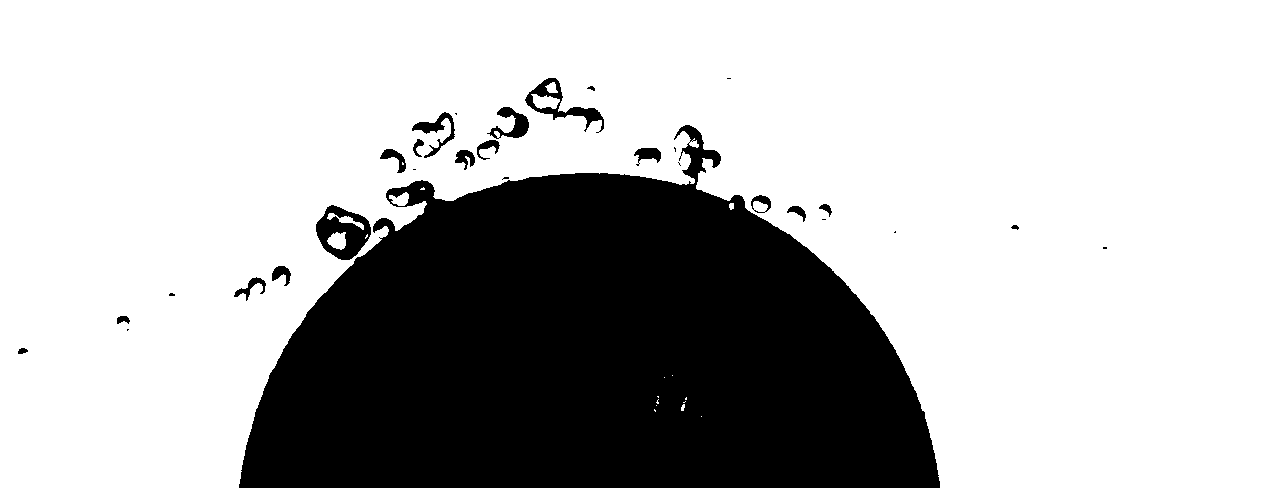

In [ ]:
# Load the image
img = cv2.imread('/content/A0_400MM_FV_24G_C001H001S0001000056.jpg',cv2.IMREAD_GRAYSCALE)
if img is None:
  print("no such image exist")
#print(img.shape)
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(binary_img)
#cv2_imshow(img)


In [ ]:
# #THIS METHOD WAS GIVING WRONG RESULTS SO KEPT ASIDE
# # finding the number of droplets in the image along with their size
# # first method(using the hough gradient method)
# img = cv2.medianBlur(img, 5) #median blur to reduce the noise
# cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR) #converting from grayscale to rgb

# # #https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d doc for the hough circle implementation

# circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20, param1=30,param2=10,minRadius=0,maxRadius=0)
# circles = np.uint16(np.around(circles))
# for i in circles[0,:]:
#     # draw the outer circle
#     cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
#     # draw the center of the circle
#     cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)
# cv2_imshow(img)






In [ ]:
#method 2 #most of the drops not get
#the hough circle method giving very bad result very off from what is actually needed
#img = cv2.GaussianBlur(img ,(51,51),0)
# cv2_imshow(img)
edges = cv2.Canny(img,5, 5)
#cv2_imshow(edges)
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
count =0
for c in contours:
     # If the contour is too small, ignore it
    #  count+=1
     area = cv2.contourArea(c)
     if 35 < area < 500:
         # Print the area of the detected droplet (not yet the physical area)
         print(f"Area of Droplet {count + 1}: {area}")
         count += 1

# # Print the total number of detected droplets
print(f"Total Number of Detected Droplets: {count}")




Area of Droplet 1: 53.0
Area of Droplet 2: 50.5
Area of Droplet 3: 60.0
Area of Droplet 4: 43.5
Area of Droplet 5: 54.0
Area of Droplet 6: 138.0
Area of Droplet 7: 37.0
Area of Droplet 8: 83.0
Area of Droplet 9: 81.5
Area of Droplet 10: 60.0
Area of Droplet 11: 42.5
Area of Droplet 12: 105.0
Area of Droplet 13: 97.5
Area of Droplet 14: 188.5
Area of Droplet 15: 54.0
Area of Droplet 16: 41.0
Area of Droplet 17: 117.5
Area of Droplet 18: 85.5
Area of Droplet 19: 63.5
Area of Droplet 20: 141.5
Area of Droplet 21: 78.0
Area of Droplet 22: 130.5
Area of Droplet 23: 39.0
Area of Droplet 24: 58.0
Area of Droplet 25: 63.5
Area of Droplet 26: 376.0
Area of Droplet 27: 41.0
Area of Droplet 28: 118.5
Area of Droplet 29: 142.0
Area of Droplet 30: 53.5
Area of Droplet 31: 72.5
Area of Droplet 32: 270.0
Area of Droplet 33: 88.5
Area of Droplet 34: 66.0
Area of Droplet 35: 46.5
Area of Droplet 36: 70.0
Area of Droplet 37: 177.5
Area of Droplet 38: 460.0
Area of Droplet 39: 35.5
Area of Droplet 40: 37

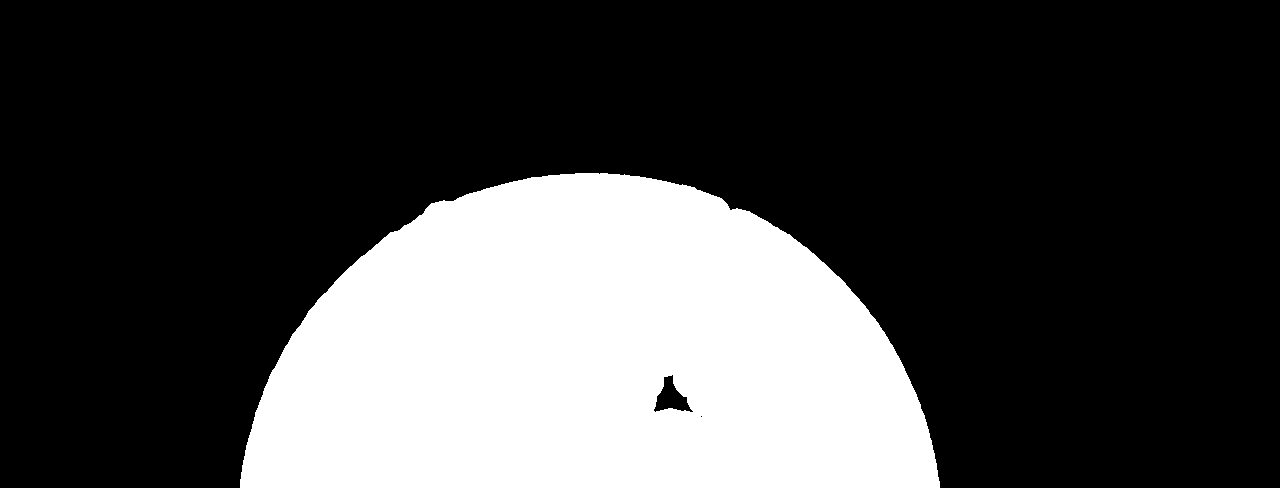

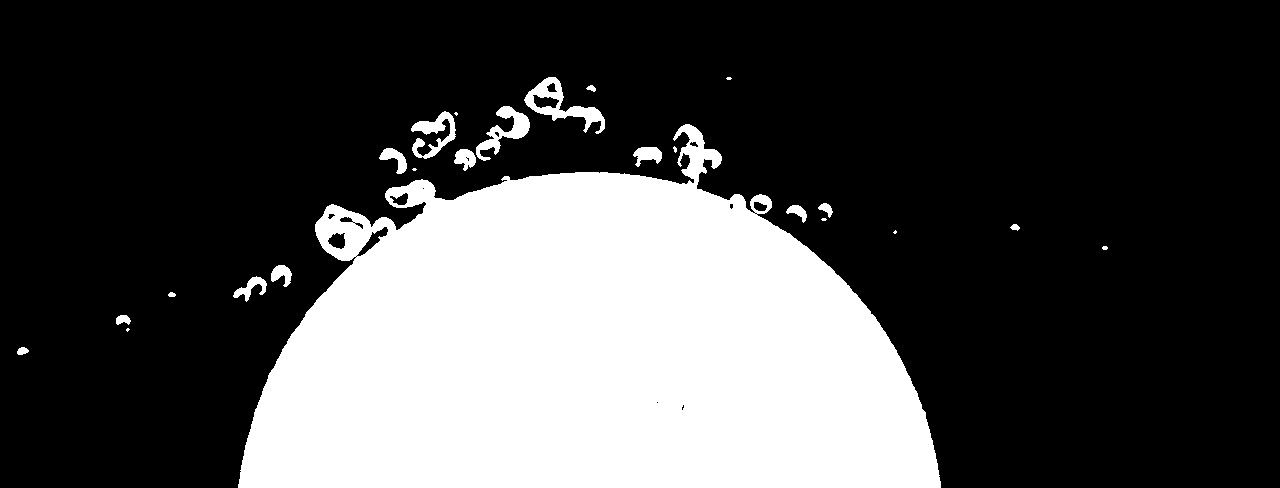

In [ ]:
# Invert the binary image
#code to use start from here dont run the entire cell just run from here
inverted_image = cv2.bitwise_not(binary_img)
# Define structuring element for morphological operations
se1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
se2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
# Apply morphological operations to reduce noise
reduce_image = cv2.morphologyEx(inverted_image, cv2.MORPH_OPEN, se1, iterations=3)
# Dilate the inverted image
dilated_image = cv2.dilate(inverted_image, se2)
# Perform region filling operation
filled_image = cv2.bitwise_not(cv2.subtract(cv2.bitwise_not(dilated_image), dilated_image))
cv2_imshow(reduce_image)
cv2_imshow(filled_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

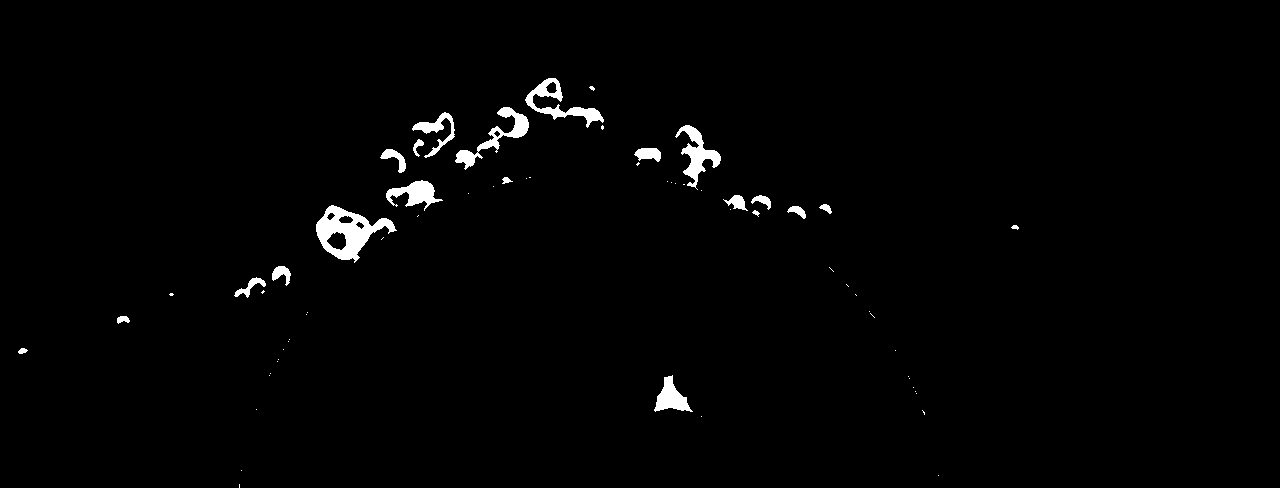

In [ ]:
# Define structuring element for morphological operations
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
# Dilate the inverted image
dilated_image = cv2.dilate(inverted_image, se)
# Perform region filling operation
filled_image = cv2.bitwise_not(cv2.subtract(cv2.bitwise_not(dilated_image), dilated_image))
# Dilate the filled image
dilated_filled_image = cv2.dilate(filled_image, se)
# Perform erosion operation twice
eroded_image = cv2.erode(dilated_filled_image, se)
eroded_image = cv2.erode(eroded_image, se)
# Perform opening operation twice
opened_image = cv2.morphologyEx(eroded_image, cv2.MORPH_OPEN, se)
opened_image = cv2.morphologyEx(opened_image, cv2.MORPH_OPEN, se)
# closing_image = cv2.morphologyEx(eroded_image, cv2.MORPH_CLOSE, se)
# closing_image = cv2.morphologyEx(closing_image, cv2.MORPH_CLOSE, se)
# Subtract reduce_image from opened_image
binary_image = cv2.subtract(opened_image, reduce_image)
#if the code is run outside the google colab then the function is cv2.imshow in colab it is cv2_imshow
#and for the imshow to work in the colab proper module should be imported
# Display binary image
cv2_imshow(binary_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
num_particles, labeled_image = cv2.connectedComponents(binary_image)

def calc_alpha_beta(data):
  mean = np.mean(data)
  variance = np.var(data)
  alpha = mean ** 2 / variance
  beta = variance / mean
  return alpha, beta



def plot_histogram_with_fit(data, bins=50, color='blue', alpha=0.7, title='', xlabel='', ylabel=''):
    plt.figure()
    plt.hist(data, bins=bins, color=color, alpha=alpha, density= True)
    # Fit gamma distribution
    shape, loc, scale = gamma.fit(data)

    # alpha ,beta = calc_alpha_beta(data)
    x = np.linspace(0, max(particle_areas), 100)
    pdf_fitted = gamma.pdf(x, shape, loc=loc, scale=scale)
    plt.plot(x, pdf_fitted, 'r-', label="Fitted Gamma Distribution")
    # x = np.linspace(min(particle_areas), max(particle_areas), 100)
    # pdf_estimated = gamma.pdf(x, alpha, scale=1/beta)
    # plt.plot(x, pdf_estimated, 'r-', label="Estimated Gamma Distribution (Method of Moments)")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
# Get area distribution of particles
particle_areas = np.zeros(num_particles)
for i in range(1, num_particles):
    particle_areas[i] = np.sum(labeled_image == i)


# Remove background (largest) particle from particle_areas
max_index = np.argmax(particle_areas)
particle_areas = np.delete(particle_areas, max_index)

# Apply condition to filter out droplets with area less than 0.15 mm²


# Find the centroid of the remaining particle with the largest area
stats = cv2.connectedComponentsWithStats(binary_image, connectivity=8, ltype=cv2.CV_32S)
centroids = stats[3]
centroid = centroids[max_index]

for centroid in centroids[1:]:
    # Convert centroid coordinates to integers
    x, y = map(int, centroid)

    # Calculate the bounding box coordinates
    x_min = max(0, x - 10)  # Adjust the margin as needed
    y_min = max(0, y - 10)  # Adjust the margin as needed
    x_max = min(binary_image.shape[1], x + 10)  # Adjust the margin as needed
    y_max = min(binary_image.shape[0], y + 10)  # Adjust the margin as needed

    # Draw the bounding box
    bounding_box_image = cv2.rectangle(binary_image.copy(), (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

# Display the result
cv2_imshow(bounding_box_image)
# x, y, w, h = cv2.boundingRect(binary_image)
# bounding_box_image = cv2.rectangle(binary_image.copy(), (x, y), (x + w, y + h), (255, 0, 0), 2)
# cv2_imshow(bounding_box_image)

# Divide particle areas by scaling factor
scaling_factor = 35.24**2
particle_areas = particle_areas / scaling_factor
particle_areas = particle_areas[particle_areas >= 0.15]

# print(particle_areas)
# Plot histogram of particle areas
# plt.figure()
# plt.hist(particle_areas, bins=50, color='blue', alpha=0.7)
# plt.title('Area Distribution of Droplets')
# plt.xlabel('Particle Area (in mm^2)')
# plt.ylabel('Frequency')
# plt.show()

plot_histogram_with_fit(particle_areas, bins=50, color='blue', alpha=0.7,
                        title='Area Distribution of Droplets with Fitted Gamma Distribution',
                        xlabel='Particle Area (in mm^2)',
                        ylabel='Frequency')

NameError: name 'cv2' is not defined

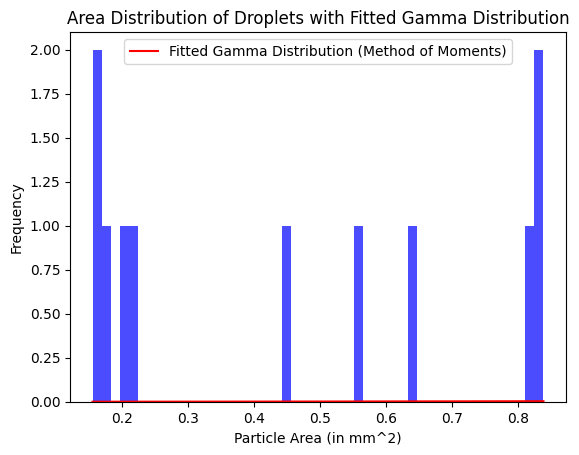

In [ ]:
def plot_histogram_with_fit(data, bins=50, color='blue', alpha=0.7, title='', xlabel='', ylabel=''):
    plt.figure()
    plt.hist(data, bins=bins, color=color, alpha=alpha, density= False)

    # Fit gamma distribution using method of moments
    alpha, beta = calc_alpha_beta(data)

    # Generate x-axis values for the gamma distribution curve
    x_curve = np.linspace(min(data), max(data), 100)

    # Plot fitted gamma distribution
    pdf_estimated = gamma.pdf(x_curve, alpha, scale=1/beta)
    plt.plot(x_curve, pdf_estimated, 'r-', label="Fitted Gamma Distribution (Method of Moments)")

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Rest of your code remains the same

# Plot histogram with fitted gamma distribution using method of moments
plot_histogram_with_fit(particle_areas, bins=50, color='blue', alpha=0.7,
                        title='Area Distribution of Droplets with Fitted Gamma Distribution',
                        xlabel='Particle Area (in mm^2)',
                        ylabel='Frequency')


In [ ]:
!pip install optv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.5/689.5 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for optv: filename=optv-0.2.8-cp310-cp310-linux_x86_64.whl size=3746589 sha256=83dbd1f6eb4dd376a0f39e1175614f57a34b74b8d9375df9b17be09e4e3366f0
  Stored in directory: /root/.cache/pip/wheels/ea/ce/02/b8ac976ad4224f1b6c12368295e9a41c0dc1b933441e8a301a
Successfully built optv


#import optv
import optv

In [44]:
from IPython.display import Image, display

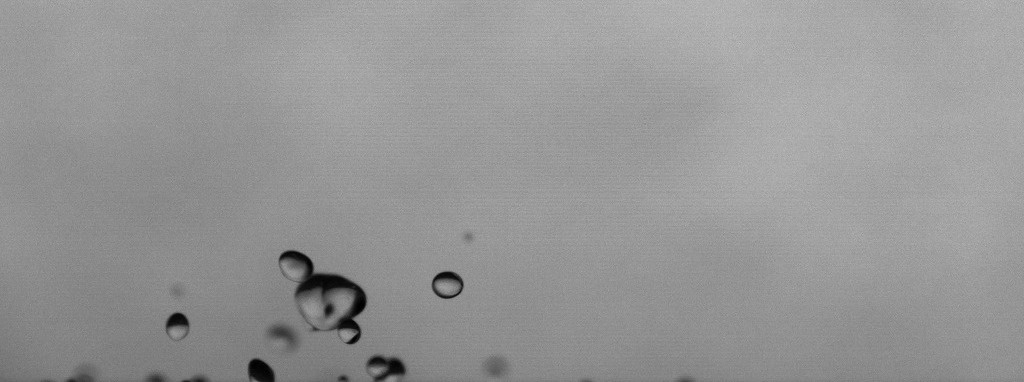

In [62]:
# Plot the image
def imshow(img, ax=None):
    if ax is None:
        ret, encoded = cv2.imencode(".jpg", img)
        display(Image(encoded))
    else:
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')

#Image loading
img = cv2.imread("/content/0G_0dFS_0dC_300mm_C001H001S0001000120(1).jpg")
# Show image
imshow(img)

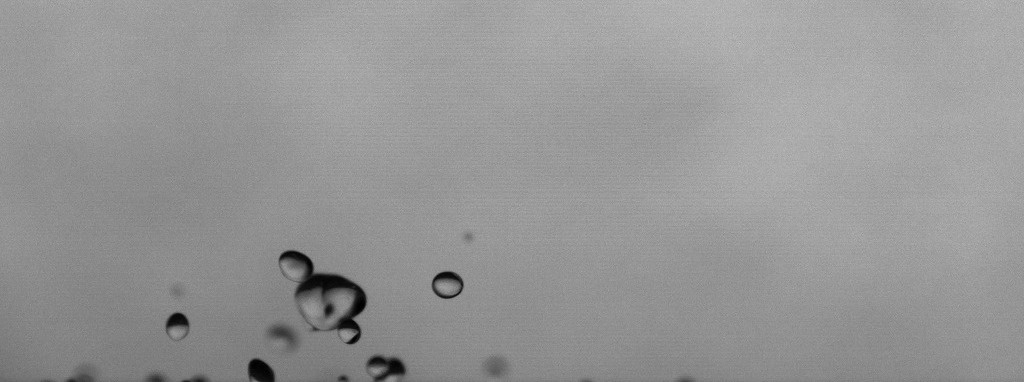

In [63]:
#image grayscale conversion
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow(gray)

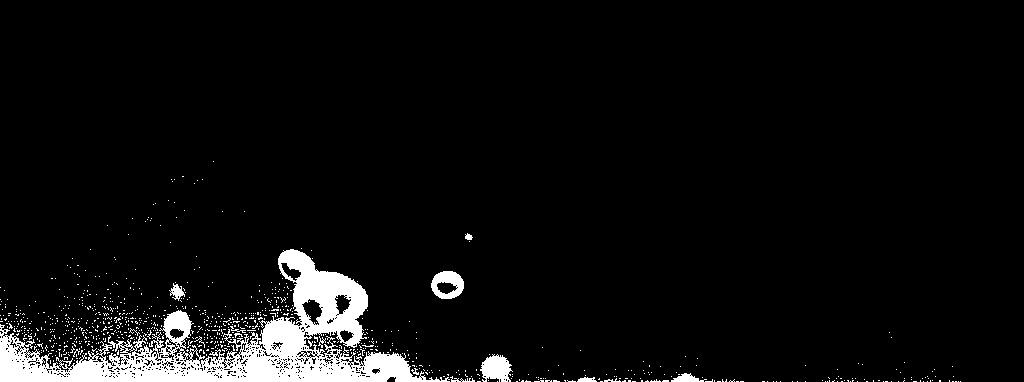

In [64]:
fixed_threshold_value = 127

# Apply fixed thresholding
ret, bin_img = cv2.threshold(gray, fixed_threshold_value, 255, cv2.THRESH_BINARY_INV)

# Display the binary image
imshow(bin_img)

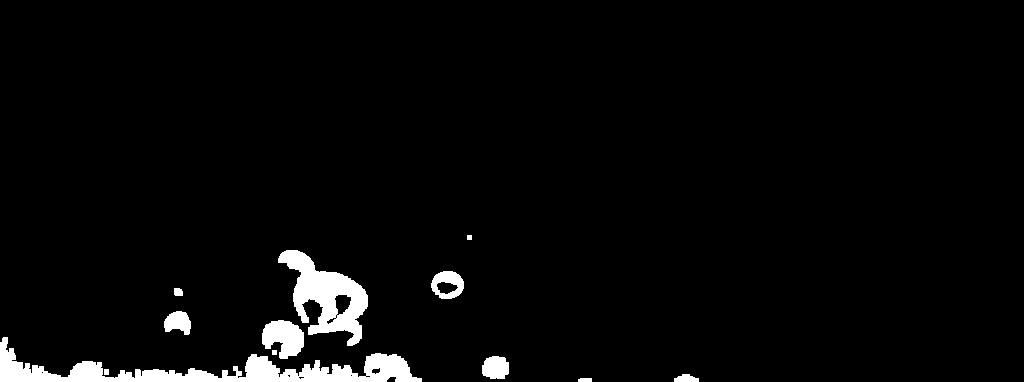

In [65]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
bin_img = cv2.morphologyEx(bin_img,
                           cv2.MORPH_OPEN,
                           kernel,
                           iterations=2)
imshow(bin_img)

<class 'numpy.ndarray'>


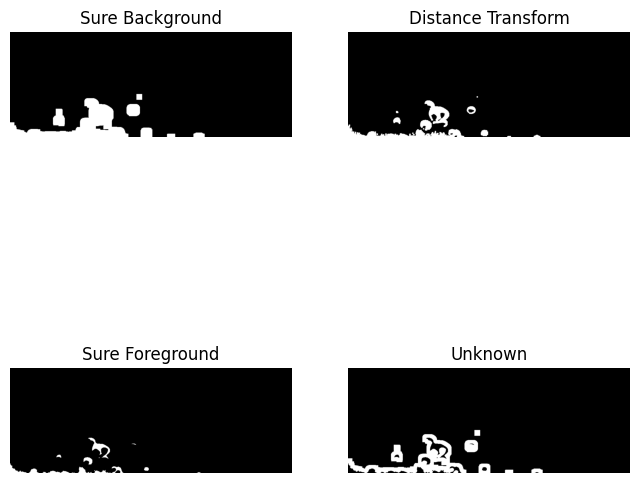

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
# sure background area
sure_bg = cv2.dilate(bin_img, kernel, iterations=8)
imshow(sure_bg, axes[0,0])
axes[0, 0].set_title('Sure Background')
bin_img = cv2.convertScaleAbs(bin_img)
print(type(bin_img))
# Distance transform
dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 3)
imshow(dist, axes[0,1])
axes[0, 1].set_title('Distance Transform')

#foreground area
ret, sure_fg = cv2.threshold(dist, 0.2 * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)
imshow(sure_fg, axes[1,0])
axes[1, 0].set_title('Sure Foreground')

# unknown area
unknown = cv2.subtract(sure_bg, sure_fg)
imshow(unknown, axes[1,1])
axes[1, 1].set_title('Unknown')

plt.show()

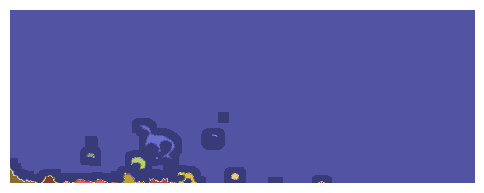

In [67]:

# Marker labelling
# sure foreground
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that background is not 0, but 1
markers += 1
# mark the region of unknown with zero
markers[unknown == 255] = 0

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()

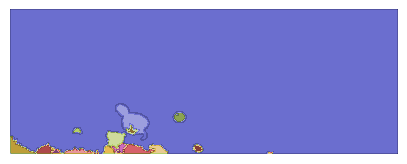

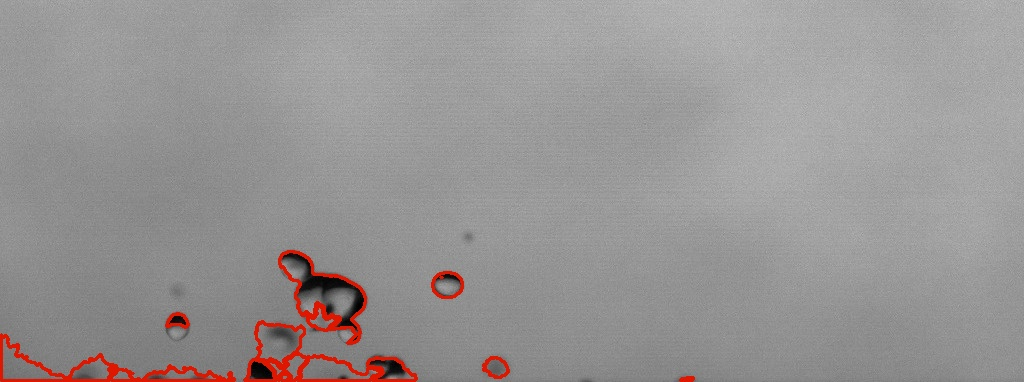

In [68]:
# watershed Algorithm
markers = cv2.watershed(img, markers)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()



labels = np.unique(markers)

coins = []
for label in labels[2:]:

# Create a binary image in which only the area of the label is in the foreground
#and the rest of the image is in the background
    target = np.where(markers == label, 255, 0).astype(np.uint8)

  # Perform contour extraction on the created binary image
    contours, hierarchy = cv2.findContours(
        target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    coins.append(contours[0])

# Draw the outline
img = cv2.drawContours(img, coins, -1, color=(0, 23, 223), thickness=2)
imshow(img)